**Sentiment analysis **

To determine the emotional tone behind words to gain understanding of the attitudes, opinions and emotions expressed within an Book

In [0]:
import re

book = "The Adventures of Sherlock Holmes.txt"

pattern = "(Chapter*\s[0-9]*\s['A-Z-\w ]+)" + "(.*?)" + "(?=Chapter*\s[0-9]*\s['A-Z-\w ]|" "End of the Project Gutenberg)"
with open(book, 'r') as f:
        text = (f.read().replace('&rsquo;', "'")
                        .replace('&lsquo;', "'")
                        .replace('&rdquo;', '"')
                        .replace('&ldquo;', '"')
                        .replace('&mdash;', '—'))

chapters = re.findall(pattern, text, re.DOTALL)

In [0]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 2.8MB/s 


In [0]:
import pandas as pd
import numpy as np
from collections import defaultdict

# Set Pandas to display all rows of dataframes
pd.set_option('display.max_rows', 500)

# nltk
from nltk import tokenize

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Plotting tools
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from tqdm import tqdm_notebook as tqdm
from tqdm import trange

In [0]:
analyzer = SentimentIntensityAnalyzer()

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
for index,chapter in enumerate(chapters):
  #print(book)
    

  text = chapters[index][1].replace('\n', '')
  sentence_list = tokenize.sent_tokenize(text)
  sentiments = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}
        
  for sentence in sentence_list:
    vs = analyzer.polarity_scores(sentence)
    sentiments['compound'] += vs['compound']
    sentiments['neg'] += vs['neg']
    sentiments['neu'] += vs['neu']
    sentiments['pos'] += vs['pos']
            
    sentiments['compound'] = sentiments['compound'] / len(sentence_list)
    sentiments['neg'] = sentiments['neg'] / len(sentence_list)
    sentiments['neu'] = sentiments['neu'] / len(sentence_list)
    sentiments['pos'] = sentiments['pos'] / len(sentence_list)

    chapters[index] = (chapters[index][0], chapters[index][1], sentiments)
#     print()

In [0]:
print(chapters[0][0])

Chapter 1 A SCANDAL IN BOHEMIA


In [0]:
compound_sentiments = [chapters[index][2]['compound'] for index,chapter in enumerate(chapters)]

In [0]:
#chap = 0
for index,chapter in enumerate(chapters):
  print(chapters[index][0])
  print('     ', compound_sentiments[index])
  print()

Chapter 1 A SCANDAL IN BOHEMIA
      3.9471801192153984e-06

Chapter 2 THE RED-HEADED LEAGUE
      1.2632881859344555e-10

Chapter 3 A CASE OF IDENTITY
      -0.0021341465560893087

Chapter 4 THE BOSCOMBE VALLEY MYSTERY
      -0.0009295838569046158

Chapter 5 THE FIVE ORANGE PIPS
      -6.950951289409399e-06

Chapter 6 THE MAN WITH THE TWISTED LIP
      7.613718259790577e-06

Chapter 7 THE ADVENTURE OF THE BLUE CARBUNCLE
      0.001477515507587158

Chapter 8 THE ADVENTURE OF THE SPECKLED BAND
      -0.0010310587818677236

Chapter 9 THE ADVENTURE OF THE ENGINEER
      0.0027833518495299636

Chapter 10 THE ADVENTURE OF THE NOBLE BACHELOR
      0.0011841817368061554

Chapter 11 THE ADVENTURE OF THE BERYL CORONET
      -0.0006389224888338018

Chapter 12 THE ADVENTURE OF THE COPPER BEECHES
      0.001432414987179365



In [0]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

x [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
y [3.9471801192153984e-06, 1.2632881859344555e-10, -0.0021341465560893087, -0.0009295838569046158, -6.950951289409399e-06, 7.613718259790577e-06, 0.001477515507587158, -0.0010310587818677236, 0.0027833518495299636, 0.0011841817368061554, -0.0006389224888338018, 0.001432414987179365]


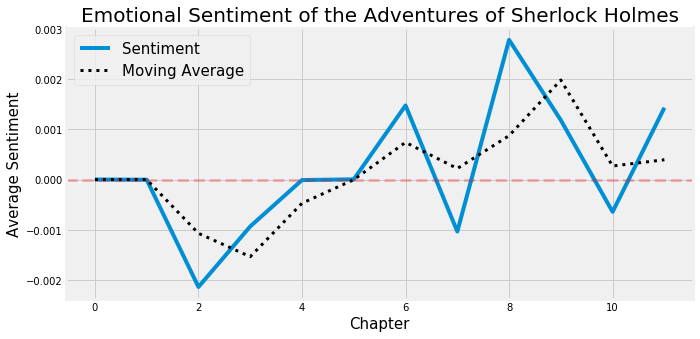

In [0]:
length = len(chapters)
x = np.linspace(0, length - 1, num=length)
y = [chapters[index][2]['compound'] for index,chapter in enumerate(chapters)]

plt.figure(figsize=(10,5 ))
print("x",x)
print("y",y)

plt.plot(x,y,label="Sentiment")

    
plt.plot(movingaverage(y, 2), color='k', linewidth=3, linestyle=':', label = 'Moving Average')
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--', linewidth=3)
plt.legend(loc='best', fontsize=15)
plt.title('Emotional Sentiment of the Adventures of Sherlock Holmes', fontsize=20)
plt.xlabel('Chapter', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)
plt.show()

In [0]:
sentiment_scores = [[chapters[index][2][sentiment] for index,chapter in enumerate(chapters)] for sentiment in ['compound', 'neg', 'neu', 'pos']]

In [0]:
print(sentiment_scores)

[[3.9471801192153984e-06, 1.2632881859344555e-10, -0.0021341465560893087, -0.0009295838569046158, -6.950951289409399e-06, 7.613718259790577e-06, 0.001477515507587158, -0.0010310587818677236, 0.0027833518495299636, 0.0011841817368061554, -0.0006389224888338018, 0.001432414987179365], [3.0594951931304612e-09, 3.856353363775697e-09, 0.00032589923137978154, 0.0004689216383673942, 1.6076933745711774e-06, 1.4225016829744197e-16, 1.1608495052286003e-06, 0.0005085888916504627, 2.8392313072788966e-06, 0.00033704395125705395, 0.00044602716109954656, 0.0003589449485944977], [0.002738181105529962, 0.0032257987389061756, 0.0037542957722469356, 0.0017357455746465468, 0.0038298099310687403, 0.0031917719428832965, 0.0028096468623677985, 0.0022739799950977193, 0.002752201558758378, 0.002756734609433121, 0.0020895233231710444, 0.001984377456459751], [1.5418827686565786e-06, 3.8563533640554315e-09, 1.4376494345076323e-06, 0.0003927353843885396, 7.695151042322546e-14, 3.1162360302991898e-06, 0.00040463664

In [0]:
compound_sentiment = sentiment_scores[0]
print('Average Book Sentiment:')
print()
for index in range(0,len(chapters)):
    compound = compound_sentiment[index]
    print(chapters[index][0]," : ",compound)
print('{:45}{:.2f}%'.format('Across the entire book', 100 * sum(compound_sentiment) / len(compound_sentiment)))

Average Book Sentiment:

Chapter 1 A SCANDAL IN BOHEMIA  :  3.9471801192153984e-06
Chapter 2 THE RED-HEADED LEAGUE  :  1.2632881859344555e-10
Chapter 3 A CASE OF IDENTITY  :  -0.0021341465560893087
Chapter 4 THE BOSCOMBE VALLEY MYSTERY  :  -0.0009295838569046158
Chapter 5 THE FIVE ORANGE PIPS  :  -6.950951289409399e-06
Chapter 6 THE MAN WITH THE TWISTED LIP  :  7.613718259790577e-06
Chapter 7 THE ADVENTURE OF THE BLUE CARBUNCLE  :  0.001477515507587158
Chapter 8 THE ADVENTURE OF THE SPECKLED BAND  :  -0.0010310587818677236
Chapter 9 THE ADVENTURE OF THE ENGINEER  :  0.0027833518495299636
Chapter 10 THE ADVENTURE OF THE NOBLE BACHELOR  :  0.0011841817368061554
Chapter 11 THE ADVENTURE OF THE BERYL CORONET  :  -0.0006389224888338018
Chapter 12 THE ADVENTURE OF THE COPPER BEECHES  :  0.001432414987179365
Across the entire book                       0.02%


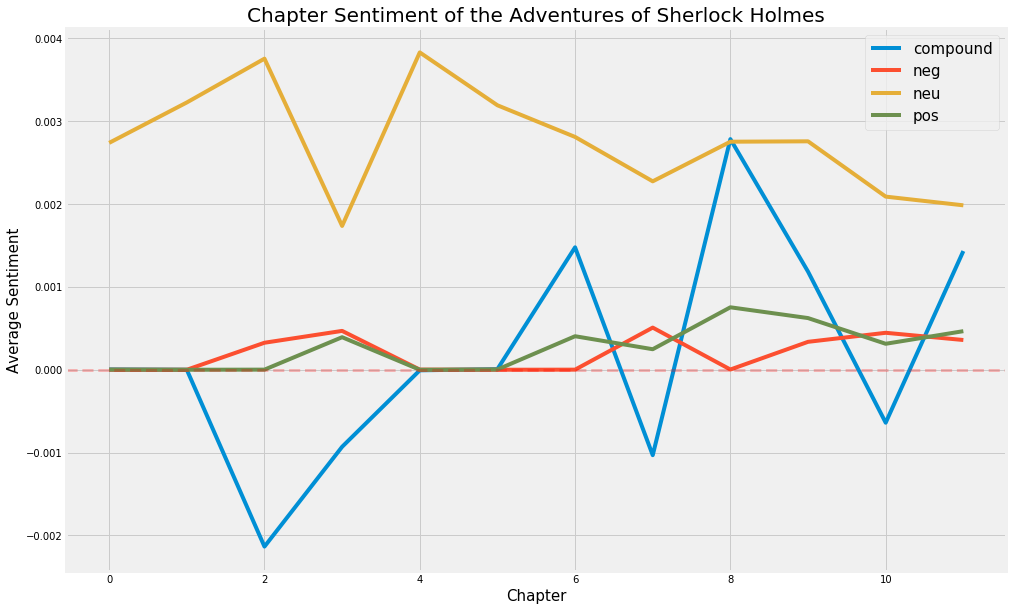

In [0]:
length = len(chapters)
x = np.linspace(0, length - 1, num=length)

plt.figure(figsize=(15, 10))
for i, sentiment in enumerate(sentiment_scores):
    plt.plot(x,
             sentiment,
             label=['compound', 'neg', 'neu', 'pos'][i])
# plt.plot(movingaverage(compound_sentiments, 10)+.1, color='k', linewidth=3, linestyle=':', label = 'Moving Average')
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--', linewidth=3)
plt.legend(loc='best', fontsize=15)
plt.title('Chapter Sentiment of the Adventures of Sherlock Holmes', fontsize=20)
plt.xlabel('Chapter', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)
plt.show()